This code implements a 2x5 layers fully connected autoencoder

In [2]:
!pip3 install tensorflow

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

Load the dataset but limit its size to run in short time...

In [5]:

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Use only 10% of the dataset
x_train = x_train[:6000]
x_test = x_test[:1000]

We can flatten the 2D image structures since we are implementing a fully connected network

In [6]:

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Print original shape
print(x_train.shape)
print(x_test.shape)

# Flatten images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Print shape after flattening
print(x_train.shape)
print(x_test.shape)

(6000, 28, 28)
(1000, 28, 28)
(6000, 784)
(1000, 784)


The training set is cut into training and validation

In [7]:
# Split validation set
x_val = x_train[-1000:]
x_train = x_train[:-1000]
print(x_val.shape)
print(x_train.shape)
# Print the size of the training and validation sets
print("Training samples:", len(x_train))
print("Validation samples:", len(x_val))

(1000, 784)
(5000, 784)
Training samples: 5000
Validation samples: 1000


Now define the neural network structure.

In [8]:
# Define autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

Create the model itself by specifying the input and output layers.

In [9]:

# Define autoencoder model
autoencoder = Model(input_img, decoded)

# Print the main params of the structure.
autoencoder.summary()

# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# autoencoder.compile(optimizer='sgd', loss='binary_crossentropy')


# Alternatively
# Create an optimizer with a specified learning rate
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)
# autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 490,208 (1.87 MB)

 Trainable params: 490,208 (1.87 MB)

 Non-trainable params: 0 (0.00 B)

Give the params of training and start it

In [10]:
# Train autoencoder model
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1959 - val_loss: 0.0814
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0778 - val_loss: 0.0751
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0727 - val_loss: 0.0725
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0709 - val_loss: 0.0691
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0667 - val_loss: 0.0650
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0632 - val_loss: 0.0618
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0603 - val_loss: 0.0596
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0585 - val_loss: 0.0582
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0569 - val_loss: 0.0561
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0541 - val_loss: 0.0533
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0520 - val_loss: 0.0509
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0492 - val_lo

Print the average loss on the validation set

In [11]:

# Evaluate validation set
loss = autoencoder.evaluate(x_val, x_val)
print('Validation Loss:', loss)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0267 
Validation Loss: 0.026743609458208084


Plot the learning curves

dict_keys(['loss', 'val_loss'])


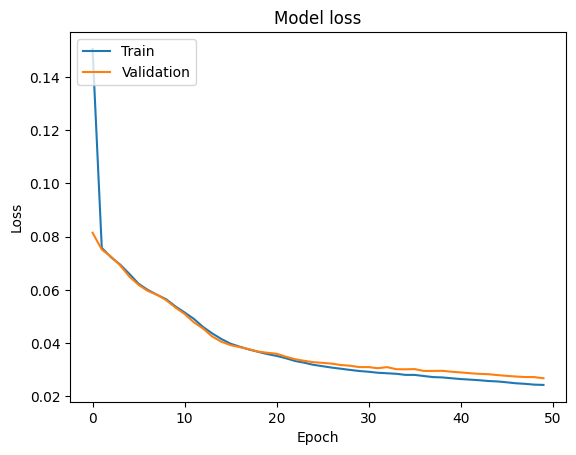

In [12]:

#Print history loss
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


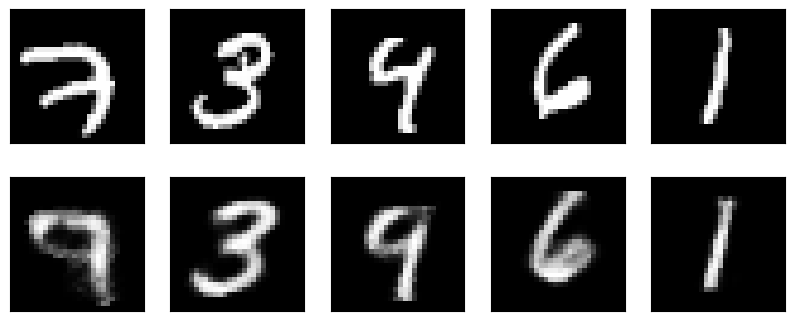

In [13]:
# Plot 5 reconstructed images
decoded_imgs = autoencoder.predict(x_val)
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()